In [1]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# redimensionar
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalizar
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertir
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
# Build the CNN model
modelCNN = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flattening layer
    tf.keras.layers.Flatten(),

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# entrenar
modelCNN.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.9049 - loss: 0.3128 - val_accuracy: 0.9878 - val_loss: 0.0456
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9851 - loss: 0.0465 - val_accuracy: 0.9885 - val_loss: 0.0378
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9908 - loss: 0.0289 - val_accuracy: 0.9888 - val_loss: 0.0439
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9959 - loss: 0.0146 - val_accuracy: 0.9895 - val_loss: 0.0424


In [6]:
# Evaluar
test_loss, test_accuracy = modelCNN.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9892 - loss: 0.0356
Test accuracy: 0.99


In [8]:
modelCNN.save("cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


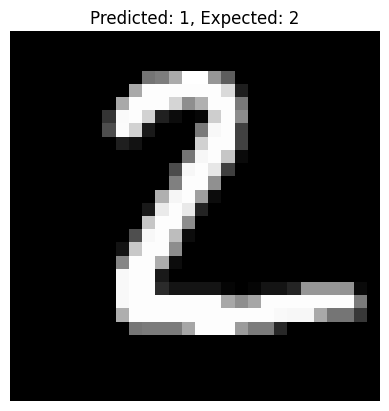

Test Image Index: 1
Predicted Label: 1
Expected Label: 2
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


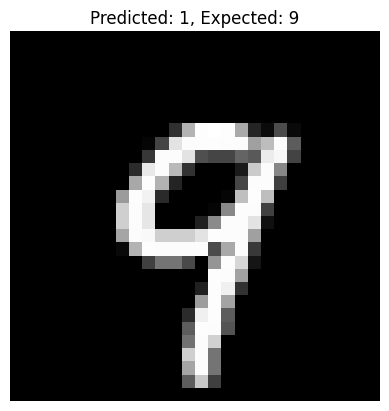

Test Image Index: 12
Predicted Label: 1
Expected Label: 9
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


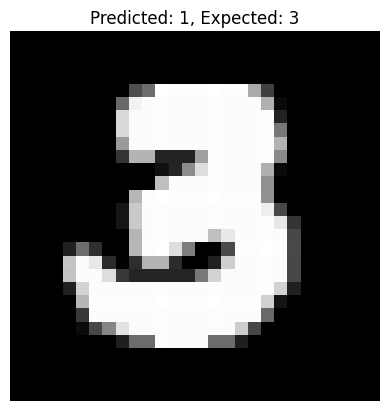

Test Image Index: 200
Predicted Label: 1
Expected Label: 3
------------------------------


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model



# Load the saved model
model = load_model("cnn_model.h5")

# Select specific test samples
indices = [1, 12, 200]  # Indexes for the test images
expected_labels = [2, 9, 3]  # Expected labels for the selected images

# Loop through the selected images, normalize, and make predictions
for i, idx in enumerate(indices):
    # Extract the image
    img = x_test[idx]

    # Normalize the image
    img_normalized = img / 255.0

    # Add a batch dimension (since the model expects input in batches)
    img_normalized = np.expand_dims(img_normalized, axis=0)

    # Make a prediction
    prediction = model.predict(img_normalized)
    predicted_label = np.argmax(prediction)

    # Display the image and prediction
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Expected: {expected_labels[i]}")
    plt.axis('off')
    plt.show()

    # Print details
    print(f"Test Image Index: {idx}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Expected Label: {expected_labels[i]}")
    print("-" * 30)
